In [32]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [33]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [34]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [35]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## iPhone6S_I Own Models

## iPhone6S_I dataset

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone6S/iPhone6S_I/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.015625 -0.0234375j 0.015625 -0.0078125j 0.0390625+0.0078125j ...
 0.03125  -0.0078125j 0.015625 -0.015625j  0.03125  -0.0078125j]
2048
79002
(2048, 79002)
[0.02281539 0.01194811 0.00464875 ... 0.00215009 0.00434015 0.0120582 ]
(10000, 2048)
(10000,)
[0.015625 -0.0078125j 0.015625 -0.0078125j 0.       -0.0078125j ...
 0.0234375-0.015625j  0.       -0.0078125j 0.0078125-0.0078125j]
2048
83422
(2048, 83422)
[0.02261406 0.01221008 0.00356162 ... 0.00220496 0.00347677 0.01195692]
(20000, 2048)
(20000,)
[0.015625 -0.0234375j 0.015625 +0.j        0.015625 -0.015625j  ...
 0.015625 +0.0078125j 0.0078125-0.0234375j 0.015625 -0.0234375j]
2048
91947
(2048, 91947)
[0.02267564 0.01198972 0.00444621 ... 0.00256938 0.00477387 0.01187558]
(30000, 2048)
(30000,)
[0.0078125-0.03125j   0.0234375+0.0078125j 0.0234375-0.015625j  ...
 0.0078125-0.0234375j 0.0390625-0.0078125j 0.0390625-0.015625j ]
2048
91066
(2048, 91066)
[0.02257732 0.01187163 0.0045188  ... 0.00236705 0.0043952  0.01194121]
(40000, 204

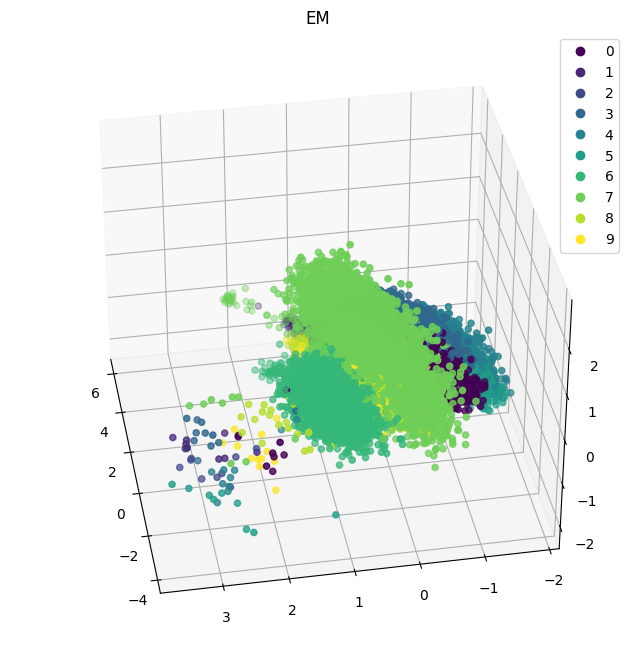

In [6]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/i6S_I_scatter.pdf')

In [7]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    


2023-02-15 12:42:33.838841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-trainable params: 0
_________________________________________________________________


In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 28s 11ms/step - loss: 2.2532 - accuracy: 0.2535 - val_loss: 2.1719 - val_accuracy: 0.3913
Epoch 2/30
2532/2532 [==============================] - 27s 11ms/step - loss: 1.8818 - accuracy: 0.5524 - val_loss: 1.4363 - val_accuracy: 0.7096
Epoch 3/30
2532/2532 [==============================] - 29s 11ms/step - loss: 0.9637 - accuracy: 0.8440 - val_loss: 0.6176 - val_accuracy: 0.8543
Epoch 4/30
2532/2532 [==============================] - 31s 12ms/step - loss: 0.4048 - accuracy: 0.9356 - val_loss: 0.2820 - val_accuracy: 0.9418
Epoch 5/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.2045 - accuracy: 0.9669 - val_loss: 0.2480 - val_accuracy: 0.9301
Epoch 6/30
2532/2532 [==============================] - 33s 13ms/step - loss: 0.1294 - accuracy: 0.9800 - val_loss: 0.1180 - val_accuracy: 0.9770
Epoch 7/30
2532/2532 [==============================] - 30s 12ms/step - loss: 0.0938 - accuracy: 0.9870 - val_loss: 0.0784 -

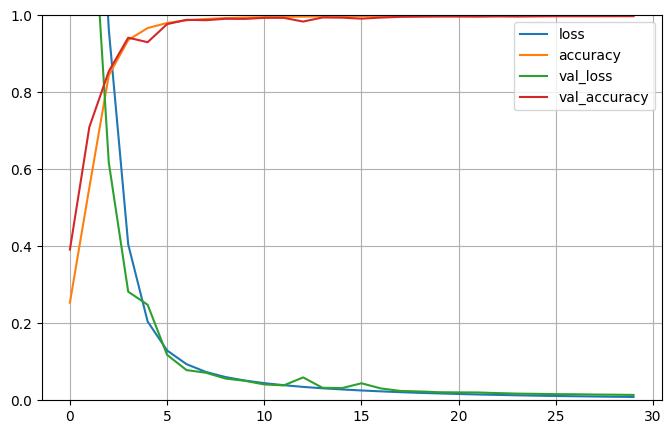

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I_model.h5")

In [13]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 5ms/step - loss: 0.0240 - accuracy: 0.9961
test loss, test acc: [0.023974254727363586, 0.9961000084877014]


In [14]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 6ms/step
[0 6 5 ... 5 5 6]
0


In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1009    1    0    0    0    0    0    0    1    0]
 [   2 1008    0    0    0    0    0    0    0    0]
 [   0    0  988    0    0    5    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    1    1 1038    0    2    0    1    0]
 [   0    0    1    0    1 1025    0    0    0    0]
 [   0    0    0    0    0    0  995    1    1    2]
 [   2    0    0    1    0    0    1  969    0    1]
 [   2    0    0    0    0    0    4    1  994    2]
 [   2    0    0    0    0    0    1    1    1  996]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      0.99      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       0.99      1.00      0.99       999
           7       1.00      0.99   

Test Accuracy:0.9961


Text(0.5, 1.0, 'Accuracy:0.996')

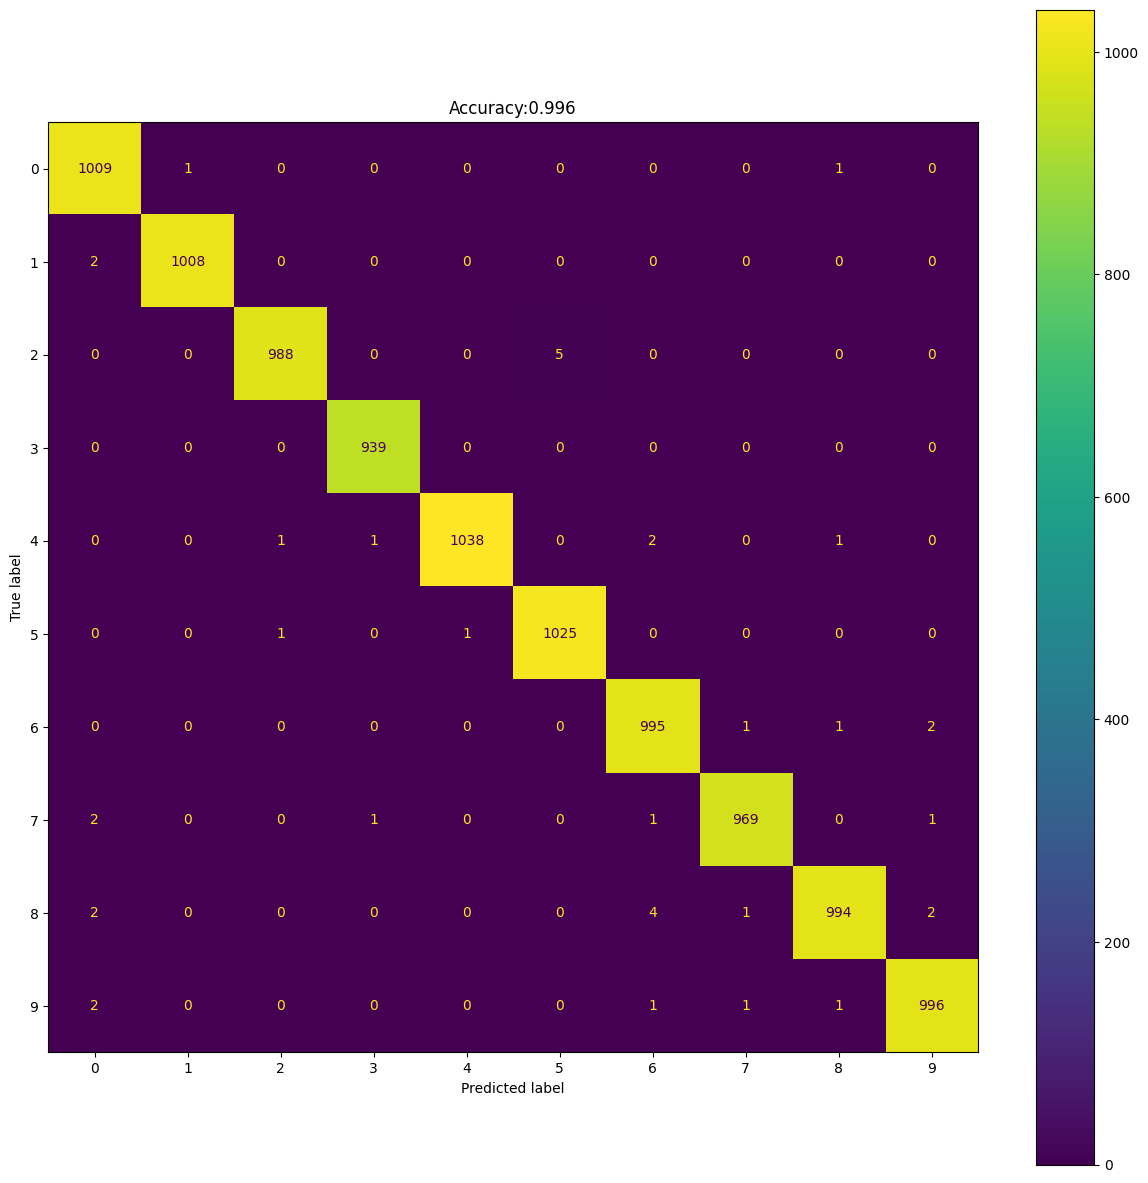

In [16]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone6S_I_confusion_matrix.pdf')

## iPhone6S_I_BeSh dataset

In [21]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone 6S_Beer Sheva,Israel/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallary_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "webbrowser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0078125-0.03125j   0.0234375-0.015625j  0.       -0.015625j  ...
 0.015625 -0.03125j   0.015625 -0.0234375j 0.0234375-0.015625j ]
2048
145922
(2048, 145922)
[0.02337346 0.01257491 0.00380188 ... 0.00212662 0.0039589  0.01270302]
0
(10000, 2048)
(10000,)
[ 0.0234375-0.015625j   0.0234375-0.0078125j  0.0234375-0.015625j  ...
  0.046875 +0.j        -0.015625 -0.0078125j  0.046875 -0.015625j ]
2048
158064
(2048, 158064)
[0.02290634 0.01239741 0.0045376  ... 0.00201616 0.00456291 0.01222033]
1
(20000, 2048)
(20000,)
[0.0234375-0.0234375j 0.015625 +0.j        0.0078125-0.0234375j ...
 0.0390625-0.03125j   0.       -0.0078125j 0.015625 +0.j       ]
2048
131661
(2048, 131661)
[0.02290835 0.01234141 0.00433436 ... 0.00230845 0.00446289 0.0121475 ]
2
(30000, 2048)
(30000,)
[-0.015625 +0.0234375j  0.0390625-0.046875j   0.0078125+0.015625j  ...
  0.0234375-0.046875j   0.015625 +0.0078125j  0.0390625-0.0234375j]
2048
143513
(2048, 143513)
[0.03454116 0.01952716 0.00571871 ... 0.00543358 0.006045

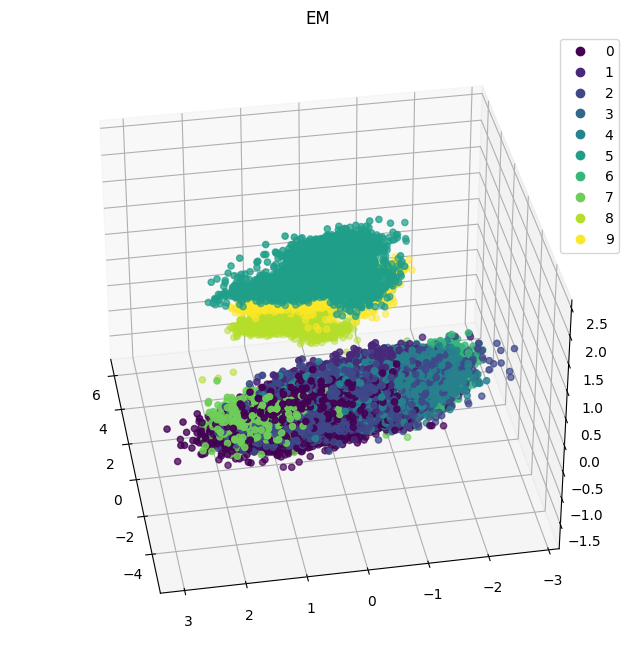

In [22]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/i6S_I_BeSh_scatter.pdf')

In [23]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [25]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I_BeSh_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 31s 12ms/step - loss: 2.0288 - accuracy: 0.3172 - val_loss: 1.6538 - val_accuracy: 0.6320
Epoch 2/30
2532/2532 [==============================] - 28s 11ms/step - loss: 1.2779 - accuracy: 0.7109 - val_loss: 0.9471 - val_accuracy: 0.7389
Epoch 3/30
2532/2532 [==============================] - 24s 9ms/step - loss: 0.6600 - accuracy: 0.8525 - val_loss: 0.4487 - val_accuracy: 0.9001
Epoch 4/30
2532/2532 [==============================] - 24s 10ms/step - loss: 0.2860 - accuracy: 0.9467 - val_loss: 0.1829 - val_accuracy: 0.9702
Epoch 5/30
2532/2532 [==============================] - 23s 9ms/step - loss: 0.1340 - accuracy: 0.9786 - val_loss: 0.0956 - val_accuracy: 0.9852
Epoch 6/30
2532/2532 [==============================] - 24s 9ms/step - loss: 0.0776 - accuracy: 0.9886 - val_loss: 0.0770 - val_accuracy: 0.9836
Epoch 7/30
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0525 - accuracy: 0.9926 - val_loss: 0.0448 - val

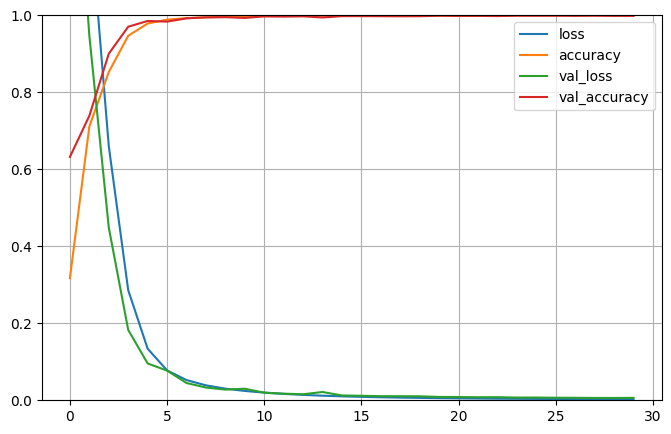

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I_BeSh_model.h5")

In [28]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0068 - accuracy: 0.9982
test loss, test acc: [0.006827429868280888, 0.998199999332428]


In [29]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [30]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1009    1    0    0    1    0    0    0    0    0]
 [   0 1009    0    0    0    0    1    0    0    0]
 [   1    0  990    0    0    0    1    1    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   2    3    0    0 1038    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    4    0    0    0    0  995    0    0    0]
 [   0    2    1    0    0    0    0  971    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       0.99      1.00      0.99      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9982


Text(0.5, 1.0, 'Accuracy:0.998')

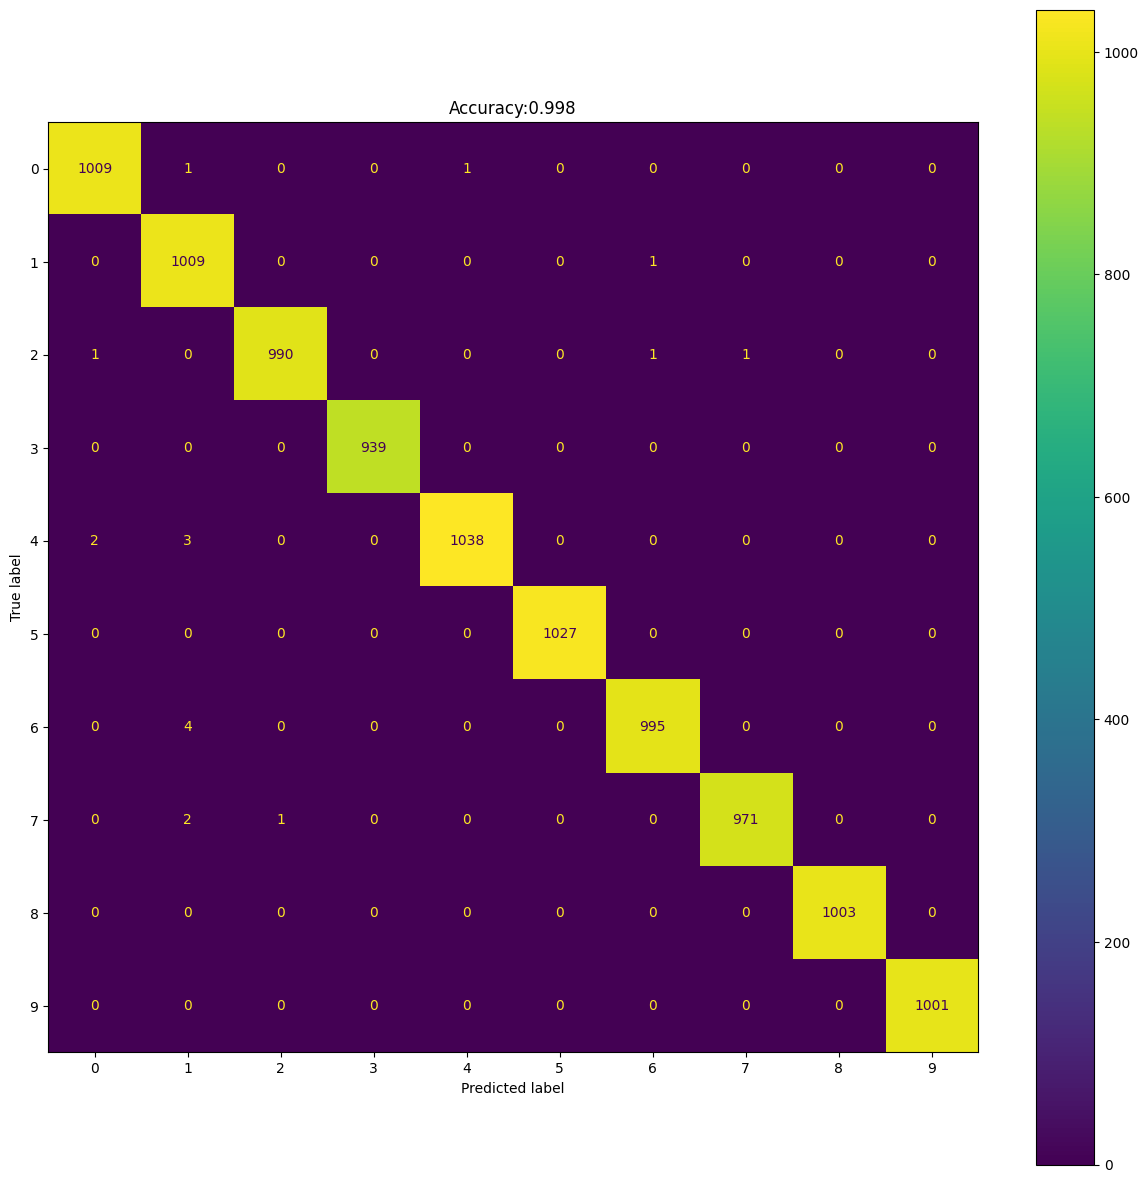

In [31]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_I_confusion_matrix.pdf')

## iPhone6S_I(ii) dataset

In [36]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Validate/iPhone6S/iPhone6S_I_(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web-browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0390625-0.03125j   0.0078125+0.j        0.0078125-0.0234375j ...
 0.0546875+0.0234375j 0.0078125-0.046875j  0.015625 +0.0078125j]
2048
135317
(2048, 135317)
[0.02546153 0.01366557 0.00427903 ... 0.00281807 0.00462026 0.01327868]
(10000, 2048)
(10000,)
[0.0078125-0.015625j  0.0234375-0.0078125j 0.0078125-0.0078125j ...
 0.03125  -0.0234375j 0.03125  -0.015625j  0.046875 -0.0078125j]
2048
119078
(2048, 119078)
[0.02263446 0.01218112 0.00445602 ... 0.00229932 0.00412573 0.01206476]
(20000, 2048)
(20000,)
[0.015625 -0.03125j   0.03125  +0.j        0.0078125-0.015625j  ...
 0.0234375-0.0078125j 0.       -0.046875j  0.       -0.015625j ]
2048
110376
(2048, 110376)
[0.02308455 0.0121083  0.00366661 ... 0.0021352  0.00424122 0.01211808]
(30000, 2048)
(30000,)
[ 0.015625 -0.0234375j  0.0234375-0.0234375j  0.0234375-0.015625j  ...
  0.0234375-0.015625j  -0.0078125-0.03125j    0.0390625-0.03125j  ]
2048
123906
(2048, 123906)
[0.02295604 0.01222045 0.00480958 ... 0.00225782 0.00426049 0.0122107

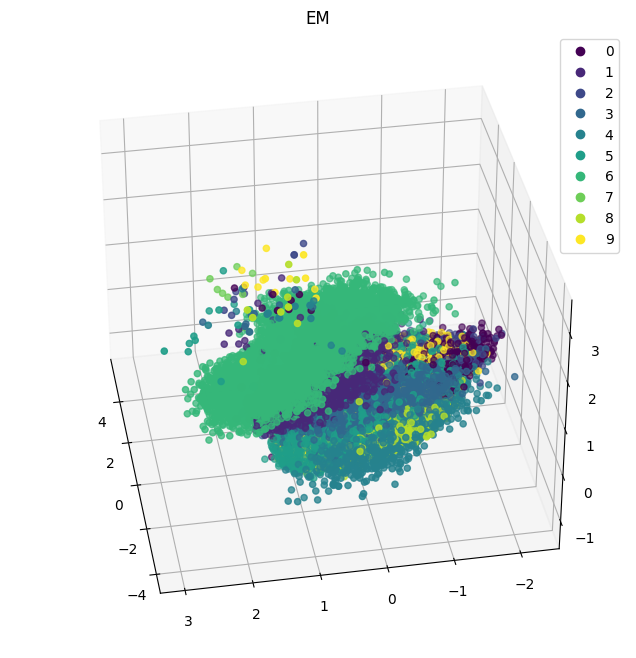

In [37]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/i6S_I(ii)_scatter.pdf')

In [38]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [40]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I(ii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 33s 13ms/step - loss: 2.2524 - accuracy: 0.2017 - val_loss: 2.1627 - val_accuracy: 0.3851
Epoch 2/30
2532/2532 [==============================] - 33s 13ms/step - loss: 1.8686 - accuracy: 0.5495 - val_loss: 1.4698 - val_accuracy: 0.7411
Epoch 3/30
2532/2532 [==============================] - 30s 12ms/step - loss: 1.0087 - accuracy: 0.8442 - val_loss: 0.6195 - val_accuracy: 0.9120
Epoch 4/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.3952 - accuracy: 0.9413 - val_loss: 0.2852 - val_accuracy: 0.9522
Epoch 5/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.1801 - accuracy: 0.9735 - val_loss: 0.1295 - val_accuracy: 0.9822
Epoch 6/30
2532/2532 [==============================] - 29s 12ms/step - loss: 0.1076 - accuracy: 0.9847 - val_loss: 0.0993 - val_accuracy: 0.9828
Epoch 7/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.0759 - accuracy: 0.9890 - val_loss: 0.0642 -

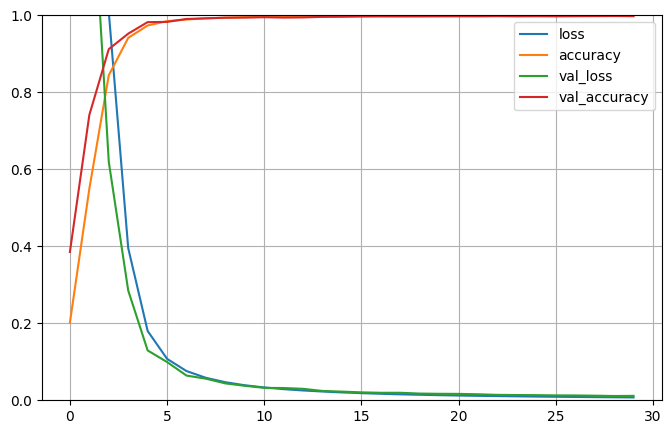

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_Own_Models/iPHONE6S_I(ii)_model.h5")

In [43]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0136 - accuracy: 0.9965
test loss, test acc: [0.01361619122326374, 0.9965000152587891]


In [44]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 6ms/step
[0 6 5 ... 5 5 6]
0


In [45]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1005    0    1    0    1    0    3    1    0    0]
 [   0 1006    1    0    0    1    2    0    0    0]
 [   0    1  991    0    0    0    1    0    0    0]
 [   0    0    0  936    0    0    1    1    1    0]
 [   2    0    1    1 1034    3    0    0    2    0]
 [   0    1    0    0    0 1025    0    1    0    0]
 [   0    1    0    0    0    0  998    0    0    0]
 [   0    0    0    1    0    2    2  968    1    0]
 [   0    0    0    0    0    0    0    1 1002    0]
 [   0    0    0    0    1    0    0    0    0 1000]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      0.99      0.99      1043
           5       0.99      1.00      1.00      1027
           6       0.99      1.00      1.00       999
           7       1.00      0.99   

Test Accuracy:0.9965


Text(0.5, 1.0, 'Accuracy:0.997')

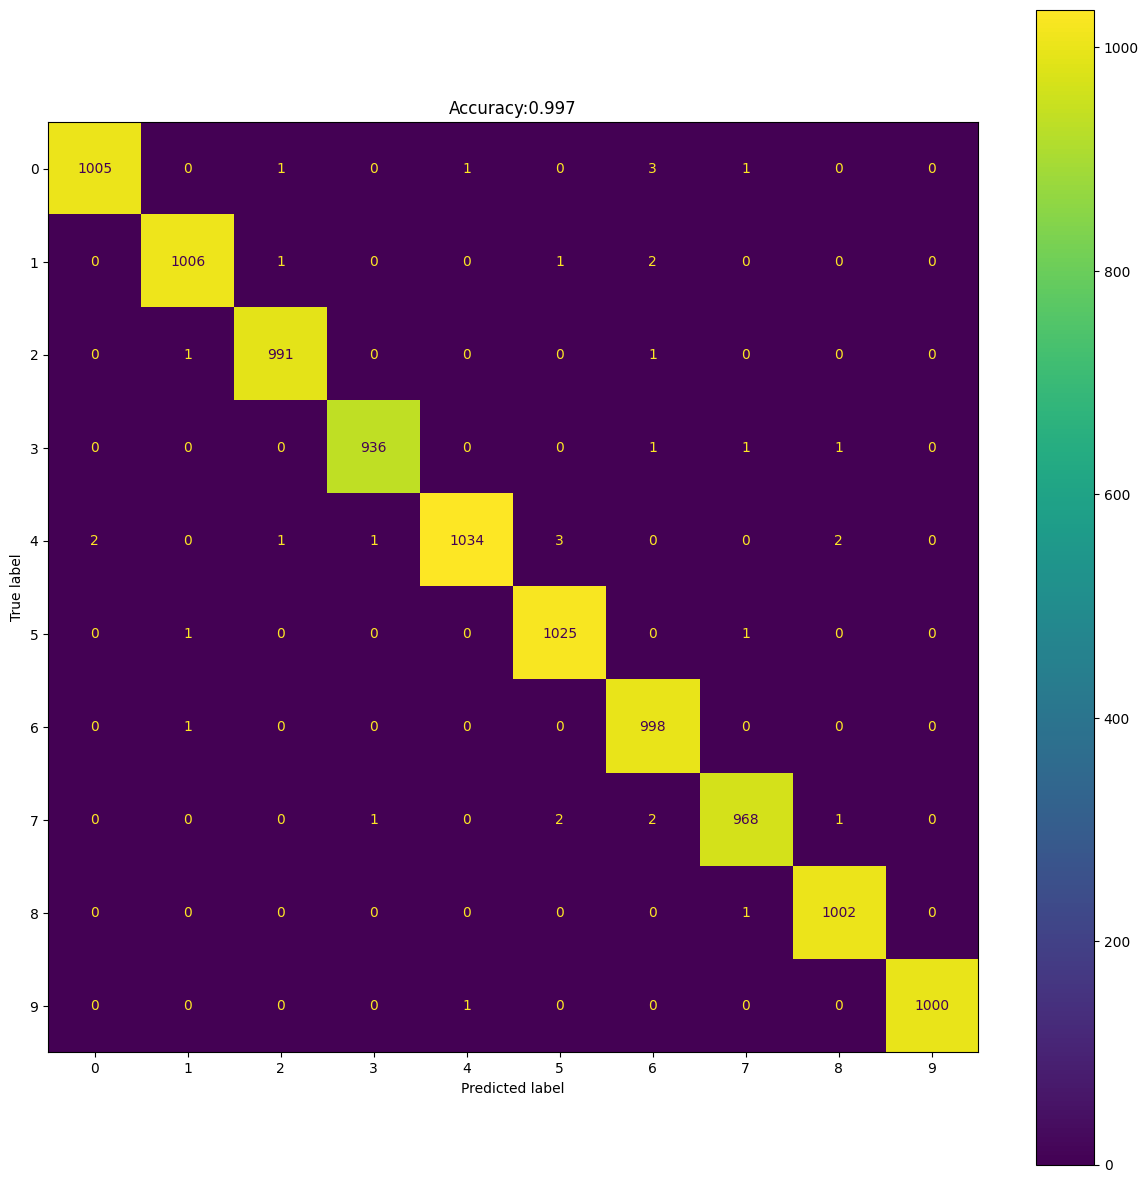

In [46]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')